In [1]:
from OscCalc import OscCalc
import FluxTools as ft
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

OscCalc is a rough python port of Josh Boehm's OscCalc oscillation calculator from MINOS. Here we are going to calculate the oscillation probabilities for muon-neutrino survival and electron-neutrino appearance (from a 100% muon-neutrino beam)

In [2]:
calcy = OscCalc()
energyBins = np.arange(0.1,5,0.001)

The energy bins are arbitrary for the plot from 0.1 to 5 GeV in 0.001 steps. The default oscillation parameters are from PDGLive and the default baseline is for NOvA.

In [3]:
eApp = np.asarray([calcy.MuToElec(E) for E in energyBins])
tauApp = np.asarray([calcy.MuToTau(E) for E in energyBins])
muSurv = np.asarray([calcy.MuToMu(E) for E in energyBins])
tot = muSurv+eApp+tauApp

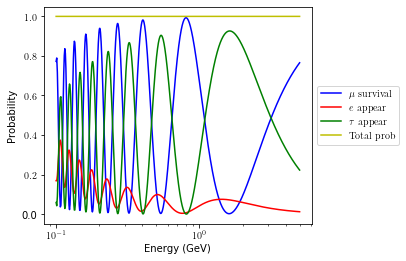

In [4]:
fig, ax = plt.subplots()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
ax.plot(energyBins, muSurv,'b-',label=r'$\mu$ survival')
ax.plot(energyBins, eApp,'r-',label=r'$e$ appear')
ax.plot(energyBins, tauApp,'g-',label=r'$\tau$ appear')
ax.plot(energyBins, tot,'y-',label=r'Total prob')
ax.set_ylabel(r'Probability')
ax.set_xlabel(r'Energy (GeV)')

# Put a legend to the right of the current axis
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xscale('log')

So here we see a plot of the oscillation probabilities for muon-neutrino oscillating to muon-neutrino, electron-neutrino and tau-neutrino. Since there are no sterile neutrinos (in this model) the total oscillation probability is unity (conservation of probability and lepton number). Below is the plot for just the electron-neutrino appearance.

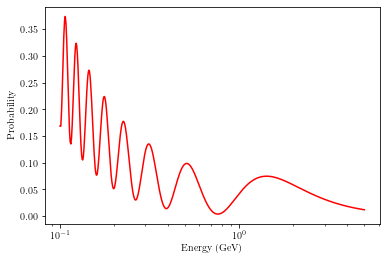

In [5]:
fig, ax2 = plt.subplots()
ax2.plot(energyBins, eApp,'r-',label="e appear")
ax2.set_ylabel('Probability')
ax2.set_xlabel('Energy (GeV)')
plt.xscale('log')

So now we have oscillation probabilities in python. The next step we need is to have some kind of a flux model. For now what we are going to do is to model the flux as a log-normal distrubtuion, at some point we can replace this with something more reasonable. 

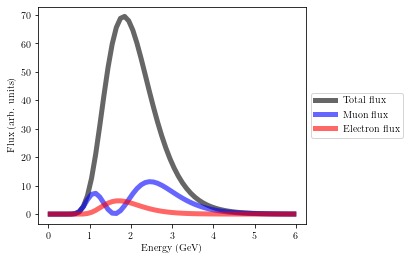

In [6]:
#The lognormal parameters
s = 0.3
loc = 0
scale = 2
#Define the array of x(energy) values for the plot
x = np.linspace(0.05,5.95, 60)

#Calculate the lognormal flux prediction
flux = 100*lognorm.pdf(x,s,loc,scale)

#Calculate the probability and flux of muons and electrons 
# (at this specifc set of oscillation parameters)
muProb = np.asarray([calcy.MuToMu(E) for E in x])
eProb = np.asarray([calcy.MuToElec(E) for E in x])
muFlux=muProb*flux
eFlux=eProb*flux

#Finally plot the fluxes
fig, ax3 = plt.subplots(1, 1)
ax3.plot(x, flux,'black', lw=5, alpha=0.6, label='Total flux')
ax3.plot(x, muFlux,'b-', lw=5, alpha=0.6, label='Muon flux')
ax3.plot(x, eFlux,'r-', lw=5, alpha=0.6, label='Electron flux')
ax3.set_ylabel('Flux (arb. units)')
ax3.set_xlabel('Energy (GeV)')

# Put a legend to the right of the current axis
box = ax3.get_position()
ax3.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))


The above plots show the total flux and the flux of electron and muon neutrinos.

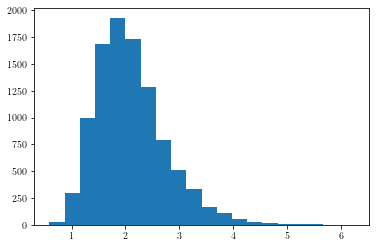

In [7]:
r = lognorm.rvs(s,loc,scale, size=10000)
a = np.hstack(r)
_ = plt.hist(a, bins=20)  # arguments are passed to np.histogram

In [8]:
I=np.trapz(flux,x)
dx=np.diff(x)
dy=np.diff(flux)
dy=np.append(dy,100-I)
dy/=2
binInt=flux+dy
binInt=binInt*0.1
sum(binInt)

99.98972905867961

95.19991629382616


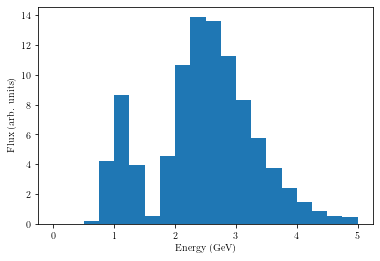

In [9]:
ft2 = ft.FluxTools()
ln = ft.LogNormalFlux()
pdf=ft2.pdfwrap(ln)
binVals=ft2.getNuMuAsimov(ln, calcy)
binEdges=ft2.binEdges
print(sum(binVals))
#Finally plot the fluxes
fig, ax4 = plt.subplots(1, 1)
ax4.hist(binEdges[:-1], binEdges, weights=binVals)
ax4.set_ylabel('Flux (arb. units)')
_ = ax4.set_xlabel('Energy (GeV)')

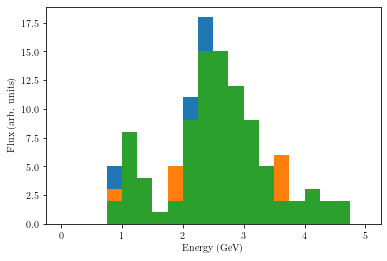

In [12]:
expVals=ft2.genNuMuExperiment(ln,calcy)
expVals2=ft2.genNuMuExperiment(ln,calcy)
expVals3=ft2.genNuMuExperiment(ln,calcy)

fig, ax5 = plt.subplots(1, 1)
ax5.hist(binEdges[:-1], binEdges, weights=expVals)
ax5.hist(binEdges[:-1], binEdges, weights=expVals2)
ax5.hist(binEdges[:-1], binEdges, weights=expVals3)
ax5.set_ylabel('Flux (arb. units)')
_ = ax5.set_xlabel('Energy (GeV)')